In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

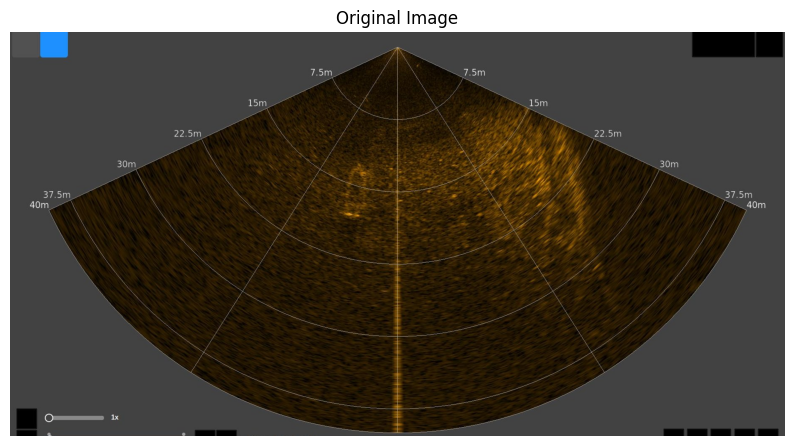

In [56]:
image_path = 'oculus.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(10, 20))
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


Defining Noise Reduction Functions

In [57]:
def apply_gaussian_blur(image, ksize=(5, 5)):
    print(f'Applying Gaussian Blur with kernel size {ksize}')
    return cv2.GaussianBlur(image, ksize, 0)

def apply_median_blur(image, ksize=5):
    print(f'Applying Median Blur with kernel size {ksize}')
    return cv2.medianBlur(image, ksize)

def apply_bilateral_filter(image, d=9, sigma_color=75, sigma_space=75):
    print(f'Applying Bilateral Filter with d={d}, sigma_color={sigma_color}, sigma_space={sigma_space}')
    return cv2.bilateralFilter(image, d, sigma_color, sigma_space)

def apply_non_local_means_denoising(image):
    print(f'Applying Non-Local Means')
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

Image Enhancement Functions

In [58]:
def apply_histogram_equalization(image):
    print('Applying Histogram Equalization')
    return cv2.equalizeHist(image)

def apply_clahe(image):
    print('Applying CLAHE')
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def image_sharpning(image):
    print('Applying Image Sharpning')
    blur = apply_median_blur(image, 5)
    return cv2.addWeighted(image, 1.5, blur, -0.5, 0)

def edge_detection(image):
    print('Applying Edge Detection')
    return cv2.Canny(image, 100, 200)

def edge_enhancement(image):
    print('Applying Edge Enhancement')
    laplacian_img = cv2.Laplacian(image, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian_img)

Applying all Denoising and enhancement functions

In [59]:
# Apply each enhancement and denoising algorithm
gaussian_blur = apply_gaussian_blur(image_rgb)
median_blur = apply_median_blur(image_rgb)
bilateral_filter = apply_bilateral_filter(image_rgb)
non_local_means = apply_non_local_means_denoising(image_rgb)
#histogram_equalization = apply_histogram_equalization(image_rgb)
#clahe = apply_clahe(image_rgb)
sharpning = image_sharpning(image_rgb)
edge = edge_detection(image_rgb)
edge_enhanced = edge_enhancement(image_rgb)



Applying Gaussian Blur with kernel size (5, 5)
Applying Median Blur with kernel size 5
Applying Bilateral Filter with d=9, sigma_color=75, sigma_space=75
Applying Non-Local Means
Applying Image Sharpning
Applying Median Blur with kernel size 5
Applying Edge Detection
Applying Edge Enhancement


Displaying the Results

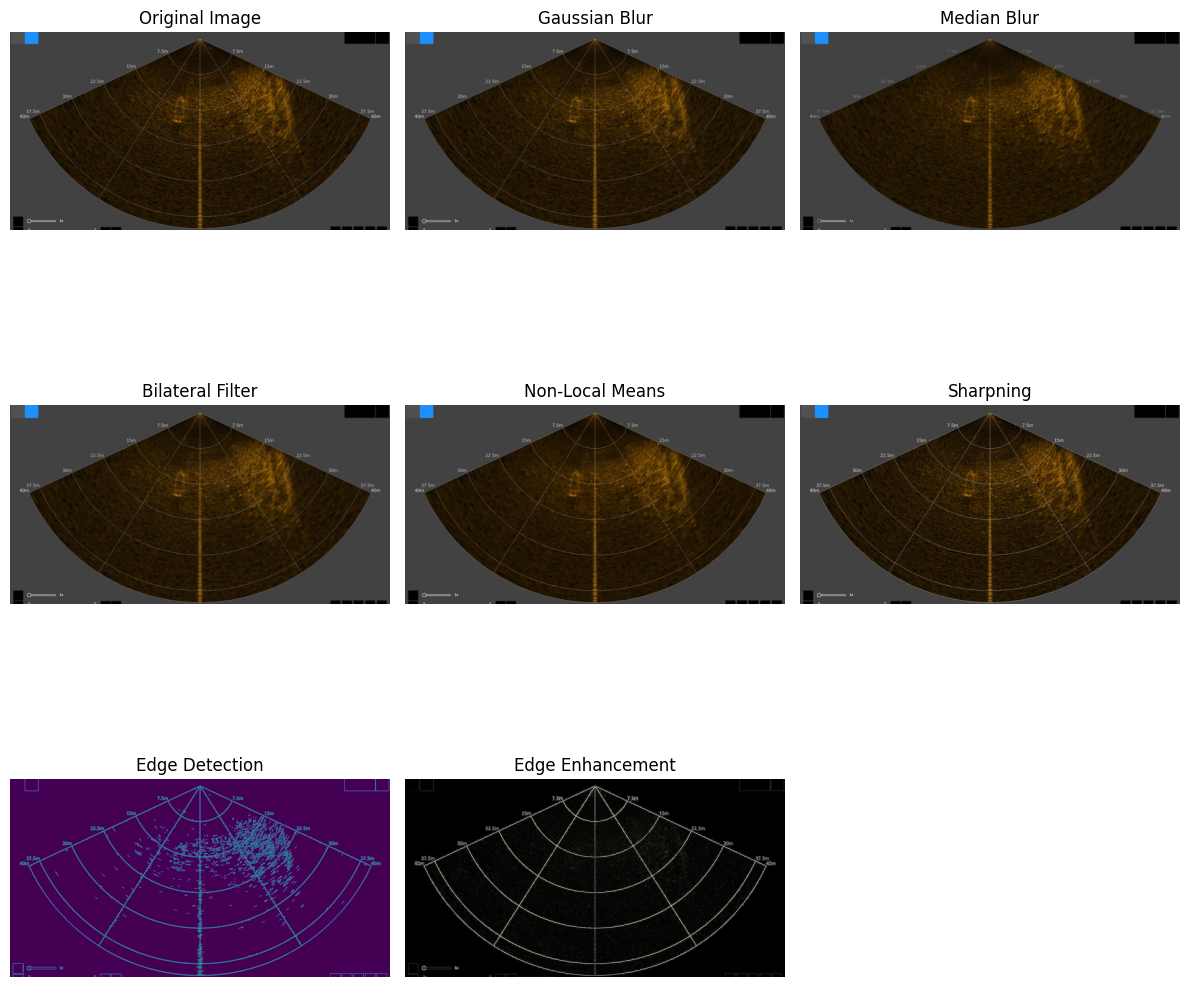

In [60]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Gaussian Blur')
plt.imshow(gaussian_blur)
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Median Blur')
plt.imshow(median_blur)
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Bilateral Filter')
plt.imshow(bilateral_filter)
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Non-Local Means')
plt.imshow(non_local_means)
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Sharpning')
plt.imshow(sharpning)
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Edge Detection')
plt.imshow(edge)
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title('Edge Enhancement')
plt.imshow(edge_enhanced)
plt.axis('off')

plt.tight_layout()
plt.show()


Applying Median Blur with kernel size 5
Applying Image Sharpning
Applying Median Blur with kernel size 5


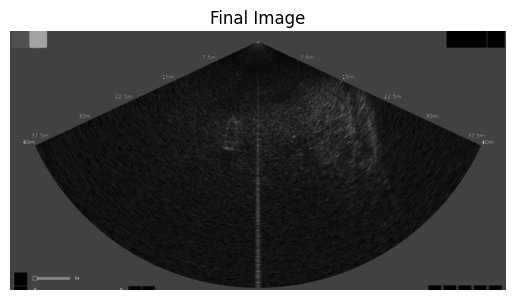

In [95]:
grey_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
denoised_image = apply_median_blur(grey_image)
sharpened_image = image_sharpning(denoised_image)



plt.title('Final Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.show()